# HR Analytics Project- Understanding the Attrition in HR

In [59]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [31]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [32]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [33]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<AxesSubplot:>

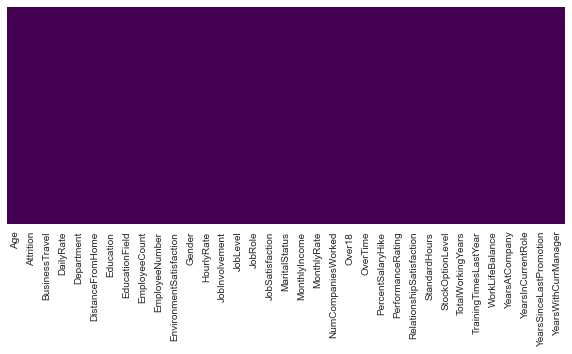

In [35]:
plt.figure(figsize =(10, 4))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

<AxesSubplot:xlabel='Attrition', ylabel='count'>

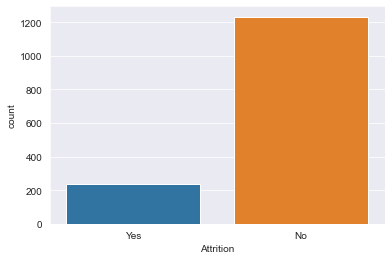

In [36]:
sns.set_style('darkgrid')
sns.countplot(x ='Attrition', data = df)

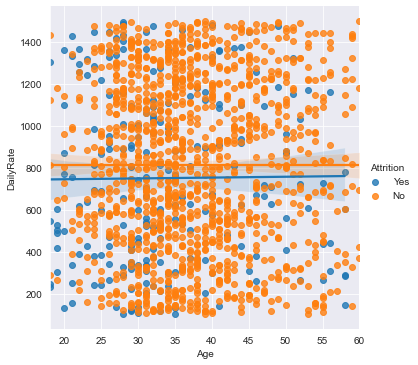

In [37]:
sns.lmplot(x = 'Age', y = 'DailyRate', hue = 'Attrition', data = df)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

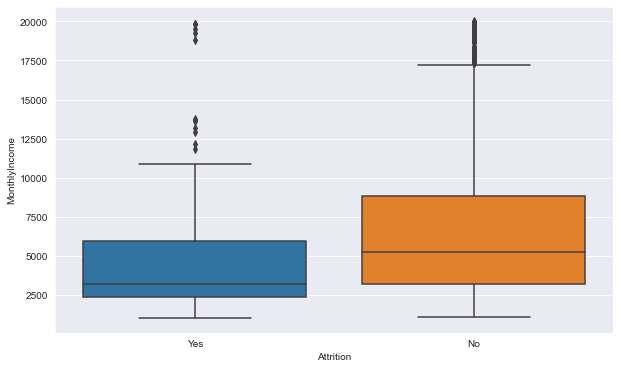

In [38]:
plt.figure(figsize =(10, 6))
sns.boxplot(y ='MonthlyIncome', x ='Attrition', data = df)

In [39]:
df.drop('EmployeeCount', axis = 1, inplace = True)
df.drop('StandardHours', axis = 1, inplace = True)
df.drop('EmployeeNumber', axis = 1, inplace = True)
df.drop('Over18', axis = 1, inplace = True)
df.shape

(1470, 31)

In [40]:
y = df.iloc[:, 1]
X = df
X.drop('Attrition', axis = 1, inplace = True)

In [41]:
lb = LabelEncoder()
y = lb.fit_transform(y)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 40)

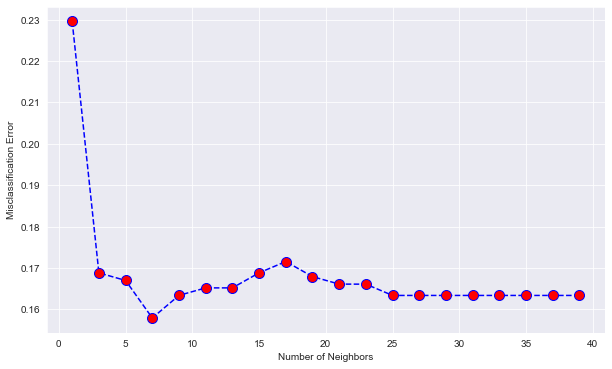

In [62]:
plt.figure(figsize = (10, 6)) 
plt.plot(range(1, 40, 2), error_rate, color ='blue', linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
plt.xlabel('Number of Neighbors') 
plt.ylabel('Misclassification Error') 
plt.show()

I am checking the accuracy with Adaboost Classifier

In [63]:
ad=AdaBoostClassifier()
ad.fit(X_train,y_train)
ad_pred=ad.predict(X_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8967391304347826
[[303   8]
 [ 30  27]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       311
           1       0.77      0.47      0.59        57

    accuracy                           0.90       368
   macro avg       0.84      0.72      0.76       368
weighted avg       0.89      0.90      0.89       368



In [65]:
# Now, I am going to check with the Support vector classifier

from sklearn.svm import SVC
svc=SVC()
ad=AdaBoostClassifier(n_estimators=50,base_estimator=svc,algorithm='SAMME')
ad.fit(X_train,y_train)
ad_pred=ad.predict(X_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.845108695652174
[[311   0]
 [ 57   0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       311
           1       0.00      0.00      0.00        57

    accuracy                           0.85       368
   macro avg       0.42      0.50      0.46       368
weighted avg       0.71      0.85      0.77       368



Here, I can see 84% accuracy is there.

In [68]:
# Now, I am going to check with Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred=gb.predict(X_test)
print(accuracy_score(y_test,gb_pred))
print(confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))

0.8722826086956522
[[303   8]
 [ 39  18]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       311
           1       0.69      0.32      0.43        57

    accuracy                           0.87       368
   macro avg       0.79      0.65      0.68       368
weighted avg       0.86      0.87      0.85       368



Here, I can see 87% accuracy is there.

# Conclusion

Here, I can see that with ADABOOST CLASSIFIER, I can achieve 89% accuracy. Hence, I have to use this model.